# Part 1：EDA & Visualization

In [235]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [123]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/clean_imdb.csv')

In [11]:
import seaborn as sns
import matplotlib as plt

In [189]:
import numpy as np

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4932 non-null   int64  
 1   director_name              4932 non-null   object 
 2   num_critic_for_reviews     4932 non-null   float64
 3   duration                   4932 non-null   float64
 4   director_facebook_likes    4932 non-null   float64
 5   actor_3_facebook_likes     4932 non-null   float64
 6   actor_2_name               4922 non-null   object 
 7   actor_1_facebook_likes     4932 non-null   float64
 8   gross                      4932 non-null   float64
 9   genres                     4932 non-null   object 
 10  actor_1_name               4925 non-null   object 
 11  movie_title                4932 non-null   object 
 12  num_voted_users            4932 non-null   int64  
 13  cast_total_facebook_likes  4932 non-null   int64

In [124]:
# drop Unnamed: 0
df = df.drop("Unnamed: 0", axis = 1)

In [125]:
# REVISION!!!
# From 1.8 We found that non-english movies need to be removed! here to do it
df = df.loc[df["language"]== 'English']

In [126]:
df = df.loc[~df["movie_title"].str.contains('Kites')]

In [127]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",CCH Pounder,Avatar,886204,4834,Wes Studi,"['avatar', 'future', 'marine', 'native', 'para...",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009,936.0,7.9,33000,Action,2009.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.0,"['Action', 'Adventure', 'Fantasy']",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,"['goddess', 'marriage ceremony', 'marriage pro...",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0,2007,5000.0,7.1,0,Action,2007.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0,"['Action', 'Adventure', 'Thriller']",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,"['bomb', 'espionage', 'sequel', 'spy', 'terror...",http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0,2015,393.0,6.8,85000,Action,2015.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.0,"['Action', 'Thriller']",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,"['deception', 'imprisonment', 'lawlessness', '...",http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0,2012,23000.0,8.5,164000,Action,2012.0
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0,"['Action', 'Adventure', 'Sci-Fi']",Daryl Sabara,John Carter,212204,1873,Polly Walker,"['alien', 'american civil war', 'male nipple',...",http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.0,2012,632.0,6.6,24000,Action,2012.0


In [128]:
df.describe()
# the unit of number of users reviewed is unknown
# assume at hundreds
# because Lord of the rings: the fellowship has 1.7 million votes to date
# but the number of user reviews for this movie is at around 5000, if 5000 x 1000 = 5 million
# which doesn't make sense 
# so assume the unit is hundreds given this dataset was collected in 2016

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,year
count,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.00000,4.603000e+03,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000
mean,145.524054,107.800911,714.857484,691.348786,7024.391798,49.67308,8.827469e+04,10399.884858,286.423218,34.202276,2002.356289,1783.475031,6.374082,7877.853139,2002.356289
std,122.327045,21.970793,2886.869352,1730.434182,15131.577484,64.97751,1.425266e+05,18439.859915,385.949710,40.962220,12.317805,4200.750090,1.111607,19964.966466,12.317805
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.00000,5.000000e+00,0.000000,1.000000,0.000000,1929.000000,0.000000,1.600000,0.000000,1929.000000
25%,56.000000,94.000000,7.000000,168.500000,682.000000,10.00000,9.964000e+03,1652.000000,74.000000,7.000000,1999.000000,333.500000,5.800000,0.000000,1999.000000
50%,117.000000,103.000000,51.000000,401.000000,1000.000000,31.00000,3.795200e+04,3408.000000,168.000000,22.000000,2005.000000,636.000000,6.500000,175.000000,2005.000000
75%,198.000000,118.000000,207.000000,653.500000,12000.000000,66.00000,1.028040e+05,14747.000000,343.500000,44.000000,2011.000000,943.500000,7.100000,5000.000000,2011.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,760.00000,1.689764e+06,656730.000000,5060.000000,390.000000,2016.000000,137000.000000,9.300000,349000.000000,2016.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 0 to 4931
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4603 non-null   object 
 1   num_critic_for_reviews     4603 non-null   float64
 2   duration                   4603 non-null   float64
 3   director_facebook_likes    4603 non-null   float64
 4   actor_3_facebook_likes     4603 non-null   float64
 5   actor_2_name               4595 non-null   object 
 6   actor_1_facebook_likes     4603 non-null   float64
 7   gross                      4603 non-null   float64
 8   genres                     4603 non-null   object 
 9   actor_1_name               4597 non-null   object 
 10  movie_title                4603 non-null   object 
 11  num_voted_users            4603 non-null   int64  
 12  cast_total_facebook_likes  4603 non-null   int64  
 13  actor_3_name               4587 non-null   objec

In [237]:
# write this df to file again
# since we made changes again in this notebook
df.to_csv('clean_imdb_2.csv')
!cp clean_imdb_2.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory


## 1.1: count of movies by genre

* from the last notebook (Preprocessing) we assumed that the first genre that each movies is tagged with, is "the strongest genre" it definitely belongs to.

* A column has been created, called "first_genre"

* we'll look at count of movies by "first_genre" 

In [130]:
# deep copy df
df1 = df.copy()

In [131]:
df1.groupby("first_genre").size().sort_values(ascending=False)

first_genre
Comedy         1232
Action         1065
Drama           839
Adventure       422
Crime           310
Biography       240
Horror          224
Documentary      73
Fantasy          51
Animation        50
Mystery          32
Thriller         21
Sci-Fi           13
Western          11
Family           11
Romance           5
Musical           4
dtype: int64

Text(0.5, 1.0, 'Num of movies by genre')

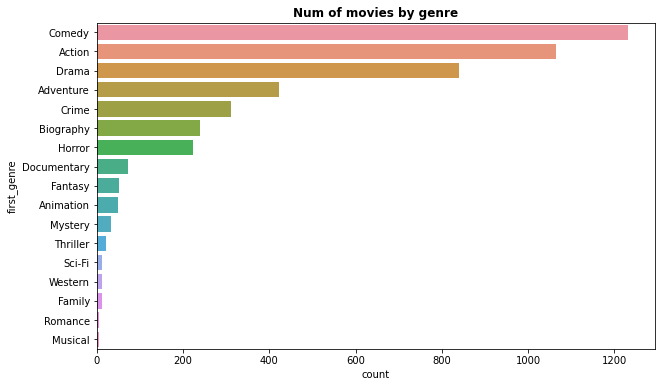

In [132]:
fig,axs=plt.subplots(figsize=(10, 6))
sns.countplot(y = 'first_genre',
              data = df1,
              order = df1['first_genre'].value_counts().index).set_title("Num of movies by genre", weight = "bold")

## 1.2: Top 10 Most voted movies

In [133]:
top_voted = df1.sort_values(['num_user_for_reviews'], ascending = False)

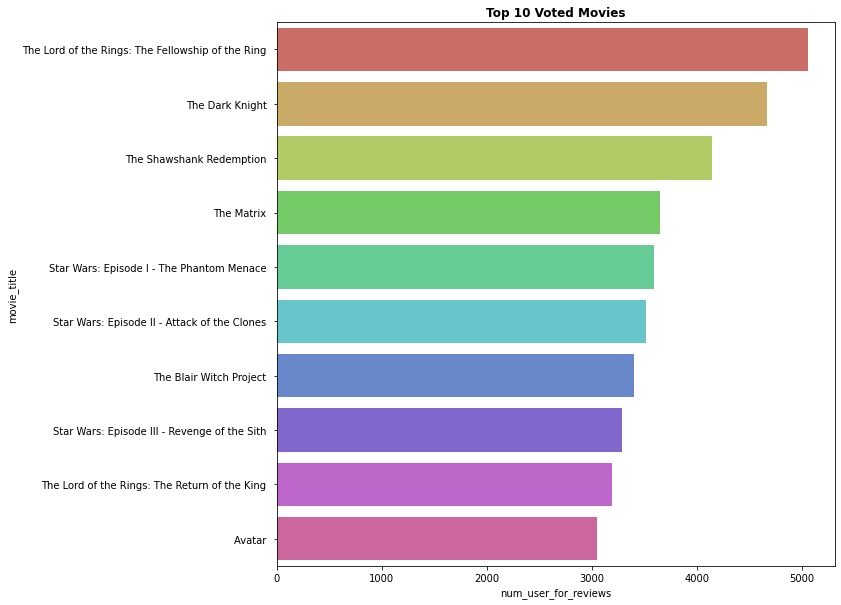

In [134]:
import matplotlib.pyplot as plt 
fig,axs=plt.subplots(figsize=(10, 10))
g=sns.barplot(y=top_voted['movie_title'][:10],x=top_voted['num_user_for_reviews'][:10], palette = 'hls')
g.set_title("Top 10 Voted Movies", weight = "bold")
plt.show()

Are we surprised at the top 10 voted piece? Not really. I'm slightly surprised at The Blair Witch Project, because I'm unfamiliar with this one.

## 1.3: Top 10 voted films vs their imdb scores

In [135]:
top_voted[:10][["movie_title", "num_user_for_reviews","imdb_score"]]

,movie_title,num_user_for_reviews,imdb_score
267,The Lord of the Rings: The Fellowship of the R...,5060.0,8.8
65,The Dark Knight,4667.0,9.0
1900,The Shawshank Redemption,4144.0,9.3
643,The Matrix,3646.0,8.7
238,Star Wars: Episode I - The Phantom Menace,3597.0,6.5
235,Star Wars: Episode II - Attack of the Clones,3516.0,6.7
4602,The Blair Witch Project,3400.0,6.4
234,Star Wars: Episode III - Revenge of the Sith,3286.0,7.6
335,The Lord of the Rings: The Return of the King,3189.0,8.9
0,Avatar,3054.0,7.9


I'm surprised that Starwars 1 & 2, and the blair wtich project are rated quite low. Everything else on the chart are quite highly rated.

## 1.4: How many movies are in each rating bucket?
* horrible = 0 - 4
* poor = 4.1 - 6
* okay = 6.1 - 7.5
* high = 7.6 - 8.5
* amazing = 8.6 - 10

In [136]:
df1['score_bin'] = pd.cut(df1.imdb_score, [0, 4, 6, 7.5, 8.5, 10],
                              labels=['horrible', 'poor', 'okay', 'high', 'amazing'], right = True)

In [137]:
df1.groupby("score_bin").size()

score_bin
horrible     169
poor        1356
okay        2492
high         554
amazing       32
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Num of movies in each rating bucket')

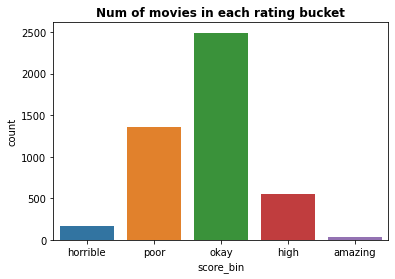

In [139]:
fig,axs=plt.subplots(figsize=(6, 4))
sns.countplot('score_bin', data=df1).set_title("Num of movies in each rating bucket", weight = "bold")

## 1.5: Top 10 Genres with the highest mean gross

In [140]:
gross_ = df1.groupby("first_genre")["gross"].mean().reset_index()
gross_10 = gross_.sort_values("gross", ascending = False)[:10]

In [141]:
gross_10

,first_genre,gross
8,Family,148.666667
2,Animation,93.108000
1,Adventure,88.678523
0,Action,78.668786
11,Musical,61.000000
12,Mystery,48.250000
9,Fantasy,38.795098
4,Comedy,36.324399
3,Biography,35.794833
10,Horror,35.159332


Text(0.5, 1.0, 'Top 10 Genres with the highest mean gross')

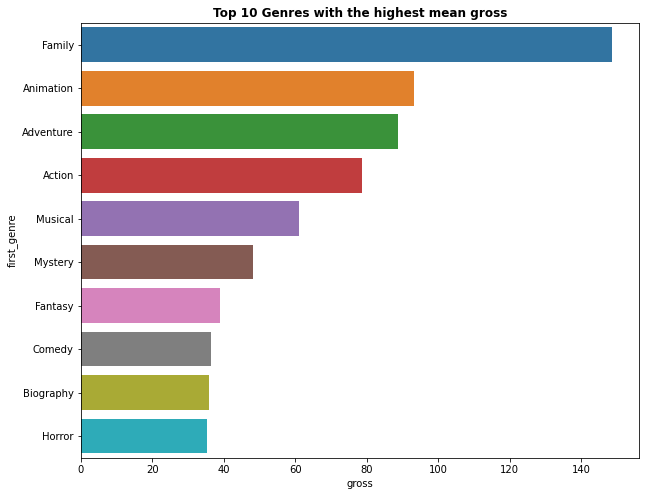

In [142]:
fig,axs=plt.subplots(figsize=(10, 8))
sns.barplot(y = 'first_genre', x = 'gross', data=gross_10).set_title("Top 10 Genres with the highest mean gross", weight = "bold")

## 1.6: Top 10 Genres with the highest mean budget

In [143]:
budget_ = df1.groupby("first_genre")["budget"].mean().reset_index()
budget_10 = budget_.sort_values("budget", ascending = False)[:10]

In [144]:
budget_10

,first_genre,budget
0,Action,61.131870
1,Adventure,61.041516
2,Animation,55.290588
12,Mystery,26.784180
5,Crime,24.710002
3,Biography,24.701985
13,Romance,24.000000
4,Comedy,21.888675
7,Drama,21.675574
14,Sci-Fi,17.076923


Text(0.5, 1.0, 'Top 10 Genres with the highest mean budget')

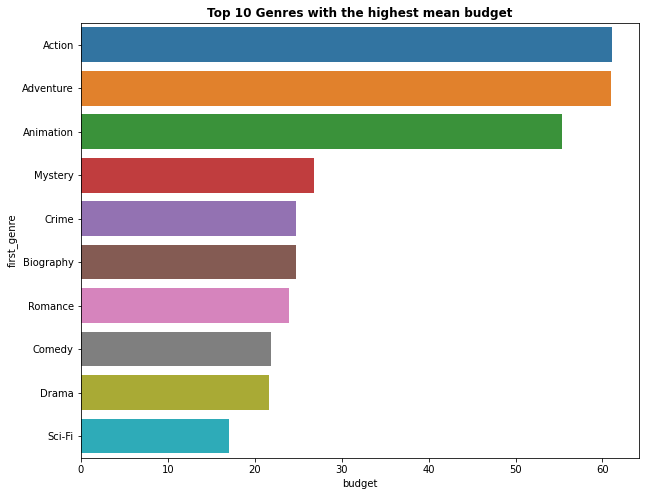

In [145]:
fig,axs=plt.subplots(figsize=(10, 8))
sns.barplot(y = 'first_genre', x = 'budget', data=budget_10).set_title("Top 10 Genres with the highest mean budget", weight = "bold")

## 1.7: Top 10 movies by highest gross

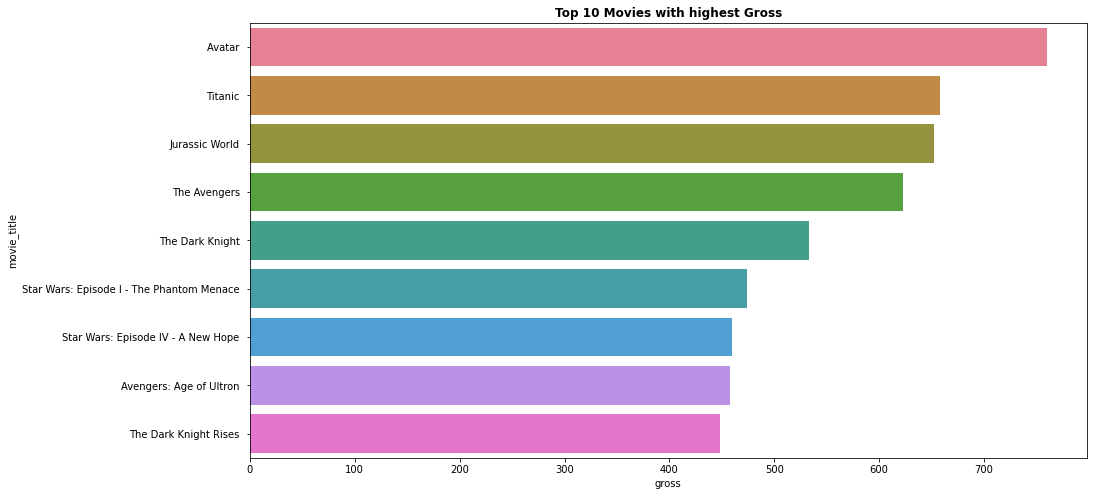

In [146]:
top_gross = df1.sort_values(['gross'], ascending = False)
fig,axs=plt.subplots(figsize=(15, 8))
g=sns.barplot(y=top_gross['movie_title'][:10],x=top_gross['gross'][:10], palette = 'husl')
g.set_title("Top 10 Movies with highest Gross", weight = "bold")
plt.show()

## 1.8: Top 10 movies by highest budget

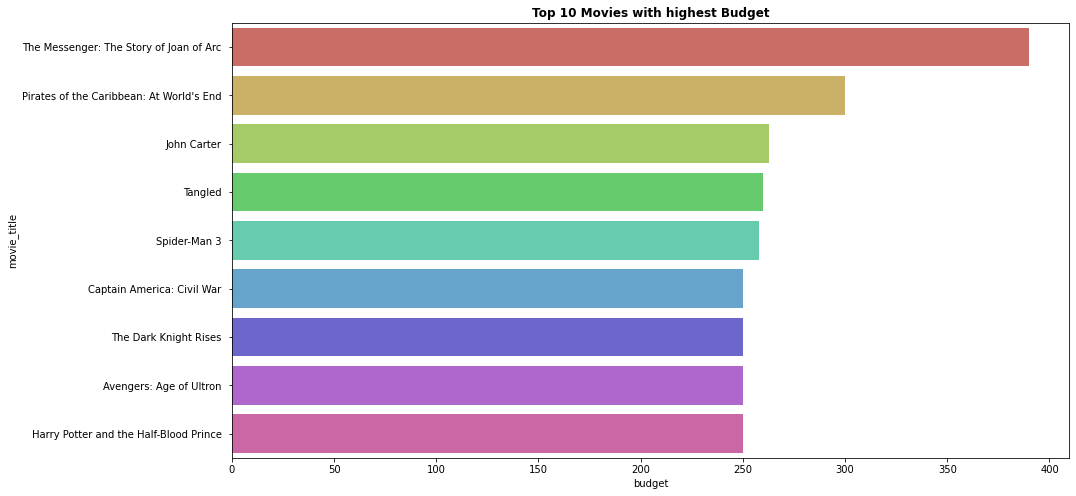

In [147]:
top_budget = df1.sort_values(['budget'], ascending = False)
fig,axs=plt.subplots(figsize=(15, 8))
g=sns.barplot(y=top_budget['movie_title'][:10],x=top_budget['budget'][:10], palette = 'hls')
g.set_title("Top 10 Movies with highest Budget", weight = "bold")
plt.show()

NOTE: Before non-english & Kites were deleted from df, in the first run of this query on the original df, almost all of the top 10 most expensive movies made no sense. Upon research, their budget was recorded in a non-USD currency. For example, The Host (most expensive in that query) is a Korean movie, and the budget is in KRW, which resulted in the crazy number.

* below in comment mode is the original code run to discover the details of such problem. They are kept in comment to avoid confusion 

* I moved the process of removing unqualified titles from the original df in the beginning of the notebook, right after the original data is read from google drive.

In [91]:
# len(df.loc[df['language'] != 'English'])

328

In [94]:
# non_eng_languages = df["language"] != "English"

In [97]:
# df[non_eng_languages].head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year,score_bin
97,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,75.864975,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,"['blood', 'godzilla', 'monster', 'sequel']",http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,64.435059,2016,106.0,8.2,0,Action,2016.0,high
202,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,75.864975,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,"['blood', 'godzilla', 'monster', 'sequel']",http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,64.435059,2016,106.0,8.2,0,Action,2016.0,high
240,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936.0,85.861183,"['Adventure', 'Comedy', 'Family', 'Fantasy']",Alain Delon,Asterix at the Olympic Games,20567,1609,Vanessa Hessler,"['1st century b.c.', 'lightsaber', 'local bloc...",http://www.imdb.com/title/tt0463872/?ref_=fn_t...,36.0,French,France,NaN,78.000000,2008,276.0,5.1,291,Adventure,2008.0,poor
323,Yimou Zhang,136.0,146.0,611.0,28.0,Ni Ni,23000.0,0.000000,"['Drama', 'History', 'Romance', 'War']",Christian Bale,The Flowers of War,38690,23240,Shigeo Kobayashi,"['abusive stepfather', 'attempted rape', 'food...",http://www.imdb.com/title/tt1410063/?ref_=fn_t...,130.0,Mandarin,China,R,94.000000,2011,196.0,7.6,13000,Drama,2011.0,high
373,Sydney Pollack,227.0,128.0,521.0,249.0,George Harris,591.0,72.000000,"['Crime', 'Mystery', 'Thriller']",Curtiss Cook,The Interpreter,86152,2100,Michael Wright,"['african', 'assassination', 'dialect', 'inter...",http://www.imdb.com/title/tt0373926/?ref_=fn_t...,411.0,Aboriginal,UK,PG-13,80.000000,2005,249.0,6.4,0,Crime,2005.0,okay


In [122]:
# df.loc[df["movie_title"].str.contains('Kites')]
# CHECKPOINT: Kites became the most expensive movie made after removing non-eng movies
# upon research, it has to be removed
# this is a Bollywood movie that is in English & Hindi, and currency non USD
# this will be done at the beginning of the notebook too

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year,score_bin
3208,Anurag Basu,41.0,90.0,116.0,303.0,Steven Michael Quezada,594.0,1.0,"['Action', 'Drama', 'Romance', 'Thriller']",Bárbara Mori,Kites,9673,1836,Kabir Bedi,"['casino', 'desert', 'love', 'suicide', 'tragi...",http://www.imdb.com/title/tt1198101/?ref_=fn_t...,106.0,English,India,NaN,600.0,2010,412.0,6.0,0,Action,2010.0,poor


## 1.9: Top directors by number of films

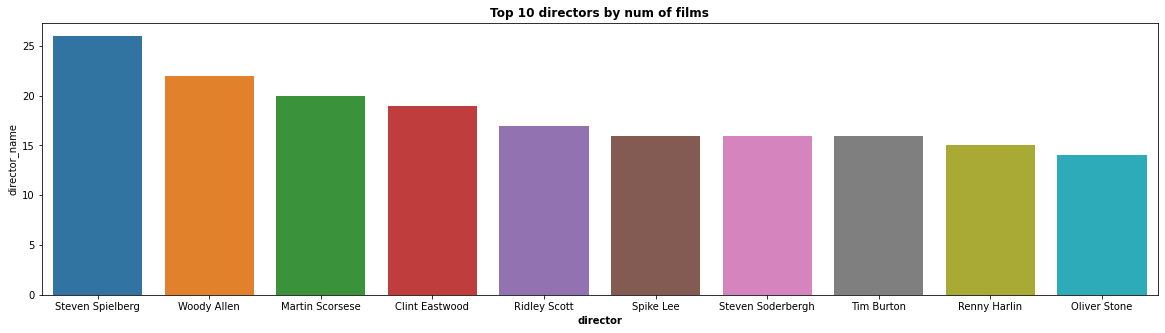

In [149]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=df1['director_name'].value_counts()[:10].index,y=df1['director_name'].value_counts()[:10])
g.set_title("Top 10 directors by num of films", weight = "bold")
g.set_xlabel("director", weight = "bold")
plt.show()

## 1.10: Top 10 directors by mean imdb score

In [193]:
#temp = df1[["director_name", "imdb_score"]]
group_by_dir = df1.groupby('director_name', sort=True)


In [232]:
group_by_dir.size().sort_values(ascending = False)[:10]

director_name
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       19
Ridley Scott         17
Steven Soderbergh    16
Spike Lee            16
Tim Burton           16
Renny Harlin         15
Oliver Stone         14
dtype: int64

In [222]:
avg_score_top_dir = group_by_dir.agg(mean_score = ("imdb_score",np.mean)).mean_score.sort_values(ascending = False)[:10]

In [224]:
score_dir_df = avg_score_top_dir.to_frame().reset_index()


In [225]:
score_dir_df

,director_name,mean_score
0,Mitchell Altieri,8.700
1,Cary Bell,8.700
2,Sadyk Sher-Niyaz,8.700
3,Charles Chaplin,8.600
4,Mike Mayhall,8.600
5,Damien Chazelle,8.500
6,Sergio Leone,8.500
7,Christopher Nolan,8.425
8,Moustapha Akkad,8.400
9,Jay Oliva,8.400


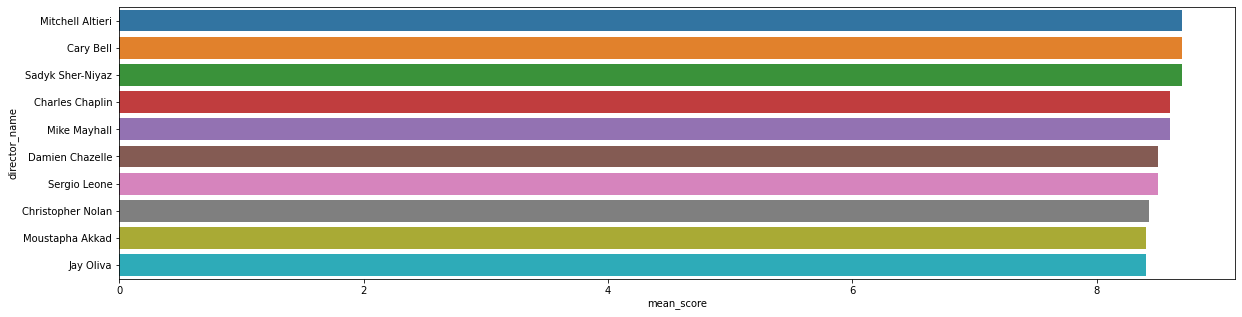

In [233]:
fig,axs=plt.subplots(figsize=(20,5))
sns.barplot(y='director_name',x="mean_score", data = score_dir_df)
g.set_title("Top 10 directors by mean imdb score", weight = "bold")
g.set_ylabel("director", weight = "bold")
plt.show()